In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger


In [41]:
import tensorflow as tf
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

MNIST Dataset
https://keras.io/datasets/
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

path: if you do not have the index file locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.

Orginal source: http://yann.lecun.com/exdb/mnist/

In [42]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


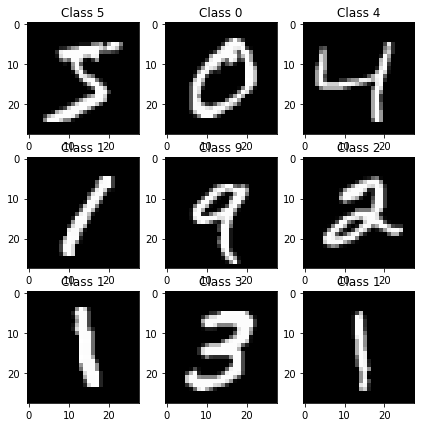

In [39]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 13s 208us/step - loss: 0.0309 - acc: 0.9901 - val_loss: 0.0647 - val_acc: 0.9833
Epoch 2/4
60000/60000 [==============================] - 12s 198us/step - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0800 - val_acc: 0.9781
Epoch 3/4
60000/60000 [==============================] - 12s 199us/step - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0740 - val_acc: 0.9815
Epoch 4/4
60000/60000 [==============================] - 12s 200us/step - loss: 0.0232 - acc: 0.9924 - val_loss: 0.0811 - val_acc: 0.9793


In [18]:
score = model.evaluate(X_test, Y_test,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08113721442139794
Test accuracy: 0.9793


In [21]:
model.save('C:\\Users\\nini_\\dev\\model.h5')

*** Test the model ***

In [4]:
from keras.models import load_model

In [5]:
model = load_model('C:\\Users\\nini_\\dev\\model.h5')

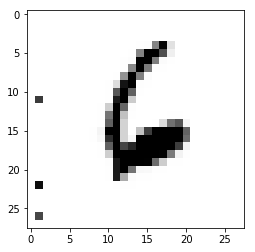

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\nini_\\dev\\mnist_6.png', target_size = (28, 28))
plt.imshow(test_image)
plt.show()



In [34]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
from numpy import*
img = image.load_img('C:\\Users\\nini_\\dev\\mnist_6.png', grayscale=True,target_size = (28, 28, 1))
img = image.img_to_array(img)
test_image = img.reshape((1,784))
preds = model.predict(test_image)
print(preds)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Class:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


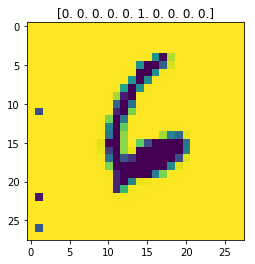

In [37]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
from numpy import*
img = image.load_img('C:\\Users\\nini_\\dev\\mnist_6.png', grayscale=True,target_size = (28, 28, 1))
img = image.img_to_array(img)
test_image = img.reshape((1,784))
img_class = model.predict(test_image)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

Class:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


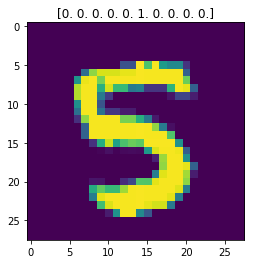

In [46]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
from numpy import*
img = X_test[120]
test_image = img.reshape((1,784))
img_class = model.predict(test_image)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()